<a href="https://colab.research.google.com/github/thegrouch4413/data_analytics/blob/main/Machine_Learning_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Dataset Overview
**Diabetes-130 US Hospitals for Years 1999 - 2008 Dataset**

Data Set Information:
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.


1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.


The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.


In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/negojovanovich3/pythonprojects/main/diabetic_data.csv')

In [ ]:
train.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


# EDA (Exploratory Data Analysis)

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

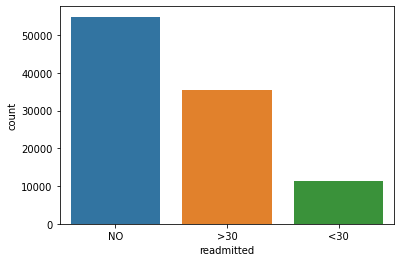

In [ ]:
sns.countplot(x='readmitted', data=train)

# Data Cleaning and Data Pre - Processing

In [ ]:
train.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
train.drop(['weight','max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'payer_code', 'medical_specialty',
       'number_outpatient','number_emergency','number_inpatient',
       'discharge_disposition_id','admission_source_id', 
       'diag_1','diag_2','diag_3'], axis=1, inplace=True)

In [ ]:
gender = pd.get_dummies(train['gender'], drop_first=True)
race = pd.get_dummies(train['race'], drop_first=True)
change = pd.get_dummies(train['change'], drop_first=True)
diabetesMed = pd.get_dummies(train['diabetesMed'], drop_first=True)
train.drop(['gender','race','change','diabetesMed'], axis=1, inplace= True)
train.head()

,encounter_id,patient_nbr,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted
0,2278392,8222157,[0-10),6,1,41,0,1,1,NO
1,149190,55629189,[10-20),1,3,59,0,18,9,>30
2,64410,86047875,[20-30),1,2,11,5,13,6,NO
3,500364,82442376,[30-40),1,2,44,1,16,7,NO
4,16680,42519267,[40-50),1,1,51,0,8,5,NO


In [ ]:
train = pd.concat([train, gender, race, change, diabetesMed],axis=1)
train.head()

,encounter_id,patient_nbr,age,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted,Male,Unknown/Invalid,AfricanAmerican,Asian,Caucasian,Hispanic,Other,No,Yes
0,2278392,8222157,[0-10),6,1,41,0,1,1,NO,0,0,0,0,1,0,0,1,0
1,149190,55629189,[10-20),1,3,59,0,18,9,>30,0,0,0,0,1,0,0,0,1
2,64410,86047875,[20-30),1,2,11,5,13,6,NO,0,0,1,0,0,0,0,1,1
3,500364,82442376,[30-40),1,2,44,1,16,7,NO,1,0,0,0,1,0,0,0,1
4,16680,42519267,[40-50),1,1,51,0,8,5,NO,1,0,0,0,1,0,0,0,1


In [ ]:
train['age'] = train['age'].str.strip('[,)')
train[['age1','age2']] = train['age'].str.split("-", n=1, expand=True)
train.drop(['age'], axis=1, inplace=True)

In [ ]:
train['age1'] = pd.to_numeric(train['age1'])
train['age2'] = pd.to_numeric(train['age2'])
train['age'] = (train['age1'] + train['age2'])/2
train.drop(['age1', 'age2'], axis=1, inplace=True)

In [ ]:
train

,encounter_id,patient_nbr,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted,Male,Unknown/Invalid,AfricanAmerican,Asian,Caucasian,Hispanic,Other,No,Yes,age
0,2278392,8222157,6,1,41,0,1,1,NO,0,0,0,0,1,0,0,1,0,5.0
1,149190,55629189,1,3,59,0,18,9,>30,0,0,0,0,1,0,0,0,1,15.0
2,64410,86047875,1,2,11,5,13,6,NO,0,0,1,0,0,0,0,1,1,25.0
3,500364,82442376,1,2,44,1,16,7,NO,1,0,0,0,1,0,0,0,1,35.0
4,16680,42519267,1,1,51,0,8,5,NO,1,0,0,0,1,0,0,0,1,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,1,3,51,0,16,9,>30,1,0,1,0,0,0,0,0,1,75.0
101762,443847782,74694222,1,5,33,3,18,9,NO,0,0,1,0,0,0,0,1,1,85.0
101763,443854148,41088789,1,1,53,0,9,13,NO,1,0,0,0,1,0,0,0,1,75.0
101764,443857166,31693671,2,10,45,2,21,9,NO,0,0,0,0,1,0,0,0,1,85.0


# Model building

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(train.drop('readmitted', axis=1))

StandardScaler()

In [ ]:
scaled_features = scalar.transform(train.drop('readmitted', axis=1))
df_feature = pd.DataFrame(scaled_features, columns=train.columns[:-1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(scaled_features, train['readmitted'], test_size =0.3)

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
predict = knn.predict(X_test)
predict

array(['<30', 'NO', 'NO', ..., 'NO', 'NO', '<30'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('readmitted',axis=1), train['readmitted'],test_size=0.3, random_state=120) 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predict = logmodel.predict(X_test)

# Classification report

In [ ]:
from sklearn.metrics import  classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predict))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         <30       0.00      0.00      0.00      3390
         >30       0.46      0.15      0.22     10714
          NO       0.55      0.91      0.69     16426

    accuracy                           0.54     30530
   macro avg       0.34      0.35      0.30     30530
weighted avg       0.46      0.54      0.45     30530



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         <30       0.00      0.00      0.00      3390
         >30       0.46      0.15      0.22     10714
          NO       0.55      0.91      0.69     16426

    accuracy                           0.54     30530
   macro avg       0.34      0.35      0.30     30530
weighted avg       0.46      0.54      0.45     30530



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

In [ ]:
print(confusion_matrix(y_test,predict))

[[    0   404  2986]
 [    0  1580  9134]
 [    0  1487 14939]]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[    0   404  2986]
 [    0  1580  9134]
 [    0  1487 14939]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


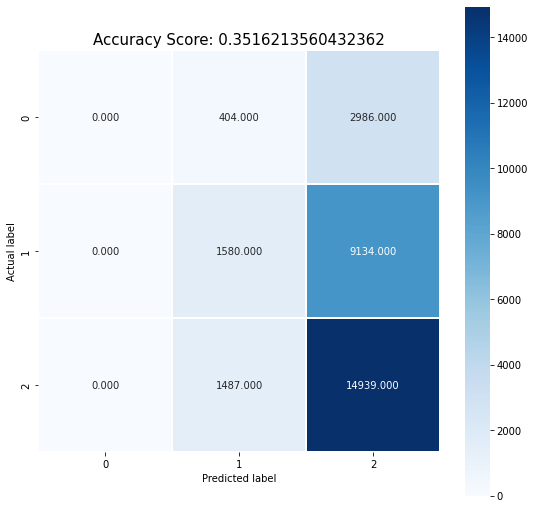

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


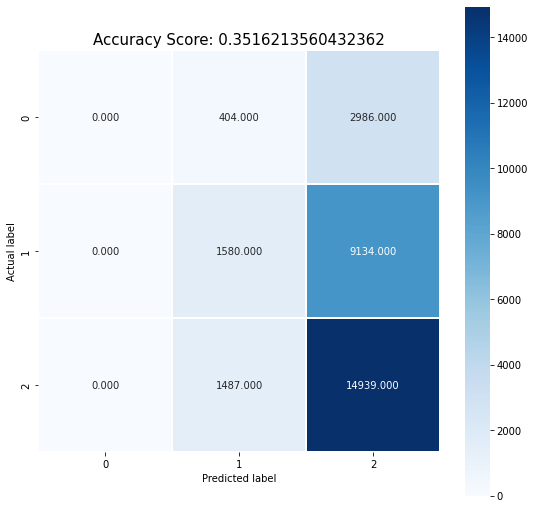

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);